# Firdaus Adi Nugroho - Practice Case Social Media Analysis

In [1]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk 

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\firdau064122\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df = pd.read_csv('clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
df.tail()

,text,target
1599995,just woke up having no school is the best feel...,1
1599996,thewdb com very cool to hear old walt intervie...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1
1599999,happy charitytuesday,1


In [5]:
df.shape

(1600000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
df.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [8]:
df.isnull().sum()

text      3247
target       0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

text      0
target    0
dtype: int64

In [11]:
df.shape

(1596753, 2)

## Data Pre-Processing
Pada Data Pre-Processing ini, kata-kata dari Twitter diolah agar lebih mudah dan lebih optimal hasil analisis untuk pemodelan dari data Twitter ini. Ada beberapa feature extraction yang akan dilakukan seperti: Spelling Correction, Lower Casing, Punctual Removal, Stopword Removal, Frequent Words Removal, Rare Word Removal, Lemmatization

### Spelling Correction

In [12]:
#df['text'].apply(lambda x: str(TextBlob(x).correct()))

Spelling Correction ini melakukan koreksi terhadap kata-kata di Twitter yang Typo menggunakan TextBlob. TextBlob mendeteksi kata typo lalu merubah kata berdasarkan bahasa inggris yang benar

### Lower Casing

In [13]:
df['text'] = df['text'].str.lower()
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


Lower Casing ini menseragamkan semua kata menjadi huruf kecil semua. Python merupakan bahasa pemograman yang case sensitive, sehingga huruf besar dan kecil akan tidak bisa dideteksi secara bersamaan

### 2. Punctuation removal

In [14]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


Punctuation Removal ini berfungsi untuk menghilangkan tanda baca seperti: titik, koma, tanda seru dan lain-lain. Hal itu dilakukan karena dalam analisis tidak perlu digunakan tanda baca tersebut

### 3. Stopword Removal

In [15]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head(5)

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

Stopword Removal digunakan untuk menghilangkan kata penghubung. Kata sambung sering kali muncul agar kata sambung tersebut tidak muncul pada analisis social media ini

### 4. Frequent Words Removal

In [16]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

good     91355
day      89776
get      82176
like     78582
go       74031
today    68226
work     64960
love     64857
going    64633
got      61454
dtype: int64

Frequent Words Removal ini berfungsi untuk menghilangkan kata-kata yang sering kali muncul terus menerus. Contohnya menghilangkan spammer-spammer

### 5. Rare Words Removal

In [17]:
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
rare_word

enjo          1
bikeriding    1
kaul          1
railfan       1
emaths        1
karked        1
oohok         1
mervel        1
jray          1
linknut       1
dtype: int64

Rare Words Removal berfungsi untuk menghilangkan kata-kata yang sangat jarang digunakan pada dataset ini

### 6. Lemmatization

In [18]:
import nltk
nltk.download('wordnet')
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\firdau064122\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                                     behaving mad see
Name: text, dtype: object

Lemmatization berfungsi untuk merubah kata-kata yang ada pada twitter menjadi kata baku, sehingga analisis kata dapat dilakukan secara tepat. Kita dapat mengetahui kata baku apa yang paling banyak tweet secara lebih bagus

# Visualisasi

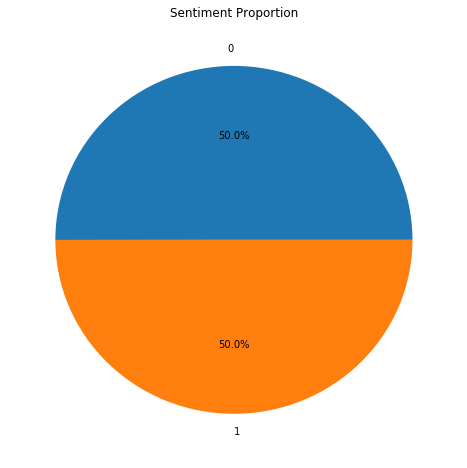

In [17]:
target = pd.Series(df['target'].value_counts())
plt.figure(figsize=(8,8))
plt.pie(target, labels=target.index, autopct = '%1.1f%%')
plt.title('Sentiment Proportion')
plt.show()

Pie Chart diatas menunjukkan angka peredaran sentimen pada dataset twitter ini. Berikut informasi dari pie chart diatas<br>
0: Menunjukkan sentimen negatif<br>
1: Menunjukkan sentimen positif<br>
Dalam hal ini peredaran sentimen ini sama besarnya

In [19]:
df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset update facebook texting might cry result...,0
2,dived many time ball managed save rest go bound,0
3,whole body feel itchy like fire,0
4,behaving mad see,0


# Word Cloud

In [2]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import os
from os import path

### Wordcloud untuk semua Data

In [28]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
mask = np.array(Image.open(path.join(d, "twitter_mask.png")))

df_all=df
words_all = ' '.join(df_all['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])

wordcloud_all = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_all)

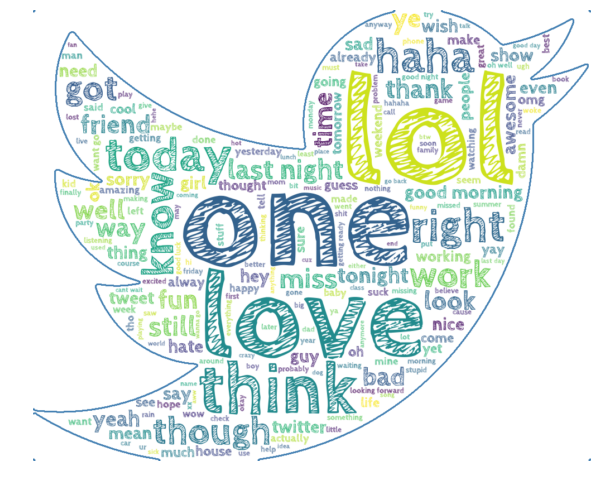

In [29]:
# store to file
#wc.to_file(path.join(d, "tweet.png"))

# show
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.show()

### Worldcloud Positive

In [24]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
mask = np.array(Image.open(path.join(d, "thumb.png")))

df_positive = df[df['target']==1]
words_all = ' '.join(df_all['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])

wordcloud_positive = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_all)

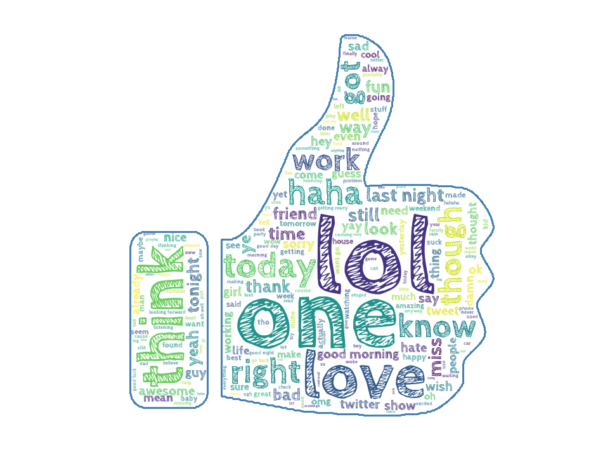

In [25]:
# store to file
#wc.to_file(path.join(d, "tweet.png"))

# show
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

### Worldcloud Negative

In [26]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
mask = np.array(Image.open(path.join(d, "thumb1.png")))

df_positive=df[df['target']==0]
words_all = ' '.join(df_all['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])

wordcloud_negative = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_all)

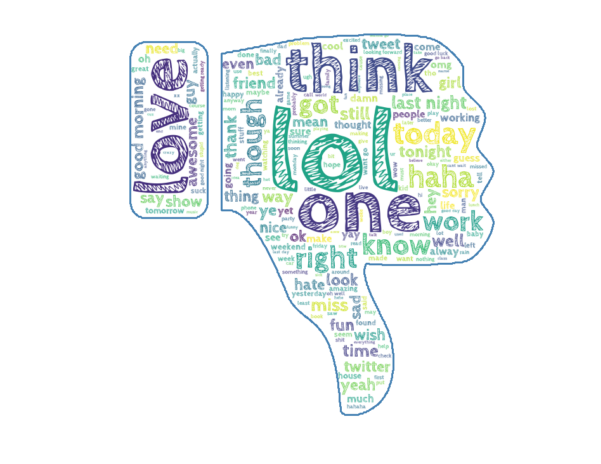

In [27]:
# store to file
#wc.to_file(path.join(d, "tweet.png"))

# show
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive

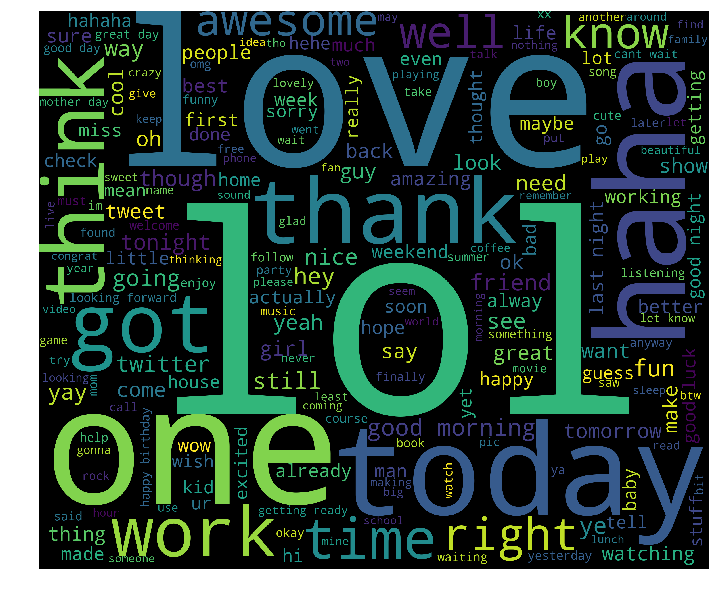

In [23]:
df_positive = df[df['target']==1]
words = ' '.join(df_positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

WORLDCLOUD ini menunjukkan kata mana yang paling banyak pada data twitter ini. Berdasarkan hasil diatas, ternyata tweet yang paling banyak ialah kata LOL (Laugh Out Loud) dan LOVE. Hal itu ditunjukkan dari besaran kata yang ada di WORDCLOUD ini pada sentimen positif

### Negative

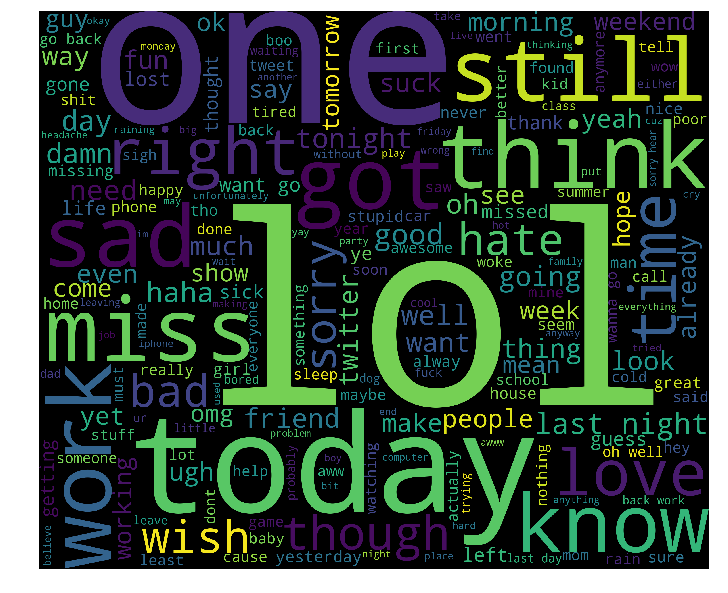

In [24]:
df_positive=df[df['target']==0]
words = ' '.join(df_positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

WORLDCLOUD ini menunjukkan kata mana yang paling banyak pada data twitter ini. Berdasarkan hasil diatas, ternyata tweet yang paling banyak ialah kata LOL (Laugh Out Loud) dan one. Hal itu ditunjukkan dari besaran kata yang ada di WORDCLOUD ini pada sentimen negatif

## Feature Extraction
Feature Extraction lanjutan ini dilakukan untuk melakukan modelling. Feature Extraction dilakukan sebagai alat untuk mengukur proses yang sedang diamati menggunakan feature yang ditentukan, setiap algoritma dapat dilakukan untuk proses klasifikasi. Terdapat Dua Feature Extraction untuk melakukan klasifikasi ini ialah <br>
- Counte Vectorizer: Untuk menghitung seberapa sering frekuensi kata dalam dataset
- TF-IDF: Untuk memberi bobot antar kata dari keselurhan kata

### Count Vectorizer

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')

### TF-IDF vectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words='english' )

### Sampling Data
Sampling Data dilakukan sebagai sampling dari total populasi data. Hal ini dilakukan karena data dari dataset ini sangat besar, sehingga diperlukannya sampling

In [51]:
#Slovin number
error = 0.05
slovin_number=len(df[df.target==0])/(1+len(df[df.target==0])*error**(2))
slovin_number

399.7997253734182

Slovin Number menujukkan berapa data minimal yang kita perlukan untuk melakukan sampling

In [21]:
sampling_negative=df[df['target']==0].sample(n=80000)
sampling_positive=df[df['target']==1].sample(n=80000)

In [23]:
sampling = sampling_negative.append(sampling_positive,ignore_index=True)

In [24]:
sampling.head()

,text,target
0,sorry screeching,0
1,afford sick day work feel good right,0
2,gonna call bff tell high heel,0
3,roof mouth feel cut lol suppose thats get eati...,0
4,kent awww mimsky huuuug,0


Berikut merupakan hasil dari sampling. Data sampling yang diambil ialah sebesar 10% dari total data twitter yaitu sebanyak 160000. Dimana terdiri dari 80000 data sampling dengan sentimen positif, dan 80000 data sampling dengan sentimen negatif. Hal itu untuk memudahkan proses modeling agar berjalan lebih cepat

In [25]:
count_vectorizer2 = CountVectorizer(max_features = 10000,min_df=5,max_df=10000,stop_words='english')

# Modeling

In [26]:
#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Training, Testing Data Split

In [38]:
X = df['text']
y = df['target']

In [27]:
#sampling
X_s = sampling['text']
y_s = sampling['target']

In [39]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [28]:
#countvectorizer
X_vectorizer_s = count_vectorizer2.fit_transform(X_s)

#tfidf vectorizer
X_tfidf_s = tfidf.fit_transform(X_s)

In [40]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

In [29]:
#train test split using countvectorizer 
train_X_vectorizer_s, test_X_vectorizer_s, train_y_s, test_y_s = train_test_split(X_vectorizer_s, y_s, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf_s, test_X_tfidf_s, train_y_s, test_y_s = train_test_split(X_tfidf_s, y_s, test_size=0.2, random_state=0)

Beberapa cell diatas merupakan syntax untuk melakukan splitting data menjadi data training dan data testing dan komposisinya yaitu data training sebesar 80% dan data testing 20%. 

## Naive Bayes

In [43]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [44]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

**Algoritma Naive Bayes** merupakan sebuah metoda klasifikasi menggunakan metode probabilitas dan statistik yg dikemukakan oleh ilmuwan Inggris Thomas Bayes. Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dr Naïve Bayes Classifier ini adalah asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi / kejadian.

## Logistic Regression

In [47]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

In [48]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

Regresi logistik merupakan alternative uji jika asumsi multivariate normal distribution pada variabel bebasnya tidak bisa terpenuhi ketika akan dilakukan analisis diskriminan. Tidak terpenuhinya asumsi ini dikarenakan variabel bebas merupakan campuran antara variabel kontinyu (metric) dan kategorial (non metric)

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Countvectorizer 
DT_vect_s = DecisionTreeClassifier(max_depth=20)
DT_vect_s.fit(train_X_vectorizer_s,train_y_s)
DT_pred_vect_train_s = DT_vect_s.predict(train_X_vectorizer_s)
DT_pred_vect_test_s = DT_vect_s.predict(test_X_vectorizer_s)

In [52]:
# TFIDFVectorizer
DT_tfidf = DecisionTreeClassifier(max_depth=15)
DT_tfidf.fit(train_X_tfidf_s,train_y_s)
DT_pred_tfidf_train = DT_tfidf.predict(train_X_tfidf_s)
DT_pred_tfidf_test = DT_tfidf.predict(test_X_tfidf_s)

Decision tree juga berguna untuk mengeksplorasi data, menemukan hubungan tersembunyi antara sejumlah calon variabel input dengan sebuah variabel target. Decision tree memadukan antara eksplorasi data dan pemodelan

## Random Forest

In [36]:
RF_vect = RandomForestClassifier(max_depth=15)
RF_vect.fit(train_X_vectorizer_s,train_y_s)
RF_pred_vect_train = RF_vect.predict(train_X_vectorizer_s)
RF_pred_vect_test = RF_vect.predict(test_X_vectorizer_s)

In [58]:
# TFIDFVectorizer
RF_tfidf = RandomForestClassifier(max_depth=15)
RF_tfidf.fit(train_X_tfidf_s,train_y_s)
RF_pred_tfidf_train = RF_tfidf.predict(train_X_tfidf_s)
RF_pred_tfidf_test = RF_tfidf.predict(test_X_tfidf_s)

Metode Random Forest  merupakan salah satu metode dalam Decision Tree. Decision Tree atau pohon pengambil keputusan adalah sebuah diagram alir yang berbentuk seperti pohon yang memiliki sebuah root node yang digunakan untuk mengumpulkan data, Sebuah inner node yang berada pada root node yang berisi tentang pertanyaan tentang data dan  sebuah leaf node yang digunakan untuk memecahkan masalah serta membuat keputusan.

## Model Evaluation

In [60]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer  Naive Bayes______________")
NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))
# using count vectorizer

# using count vectorizer
print("______________ TF-IDF  Naive Bayes______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

# using count vectorizer
print("______________ Countvectorizer  Logistic Regression______________")
Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF  Logistic Regression______________")
Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

print("________Countvectorizer Decision Tree________")

DT_recall_vec_train_s = recall_score(train_y_s, DT_pred_vect_train_s, average="micro")
DT_recall_vec_test_s = recall_score(test_y_s, DT_pred_vect_test_s,average="micro") 

DT_precision_vec_train_s = precision_score(train_y_s, DT_pred_vect_train_s,average="micro")
DT_precision_vec_test_s = precision_score(test_y_s, DT_pred_vect_test_s,average="micro")

DT_f1_score_vec_train_s = f1_score(train_y_s, DT_pred_vect_train_s,average="micro")
DT_f1_score_vec_test_s = f1_score(test_y_s,DT_pred_vect_test_s,average="micro")

print('Information :')

print('Recall train & test     : %.2f%%' % (DT_recall_vec_train_s * 100), '&', '%.2f%%' % (DT_recall_vec_test_s * 100))
print('Precision train & test  : %.2f%%' % (DT_precision_vec_train_s * 100), '&', '%.2f%%' % (DT_precision_vec_test_s * 100))
print('F1 Score train & test   : %.2f%%' % (DT_f1_score_vec_train_s * 100), '&', '%.2f%%' % (DT_f1_score_vec_test_s * 100))

# using count vectorizer
print("______________ TF-IDF Decision Tree ______________")


DT_recall_tfidf_train = recall_score(train_y_s, DT_pred_tfidf_train, average="micro")
DT_recall_tfidf_test = recall_score(test_y_s, DT_pred_tfidf_test,average="micro") 

DT_precision_tfidf_train = precision_score(train_y_s, DT_pred_tfidf_train,average="micro")
DT_precision_tfidf_test = precision_score(test_y_s, DT_pred_tfidf_test,average="micro")

DT_f1_score_tfidf_train = f1_score(train_y_s, DT_pred_tfidf_train,average="micro")
DT_f1_score_tfidf_test = f1_score(test_y_s,DT_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (DT_recall_tfidf_train * 100), '&', '%.2f%%' % (DT_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (DT_precision_tfidf_train * 100), '&', '%.2f%%' % (DT_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (DT_f1_score_tfidf_train * 100), '&', '%.2f%%' % (DT_f1_score_tfidf_test * 100))

# using count vectorizer
print("______________ Countvectorizer  Random Forest______________")
RF_recall_vec_train = recall_score(train_y_s, RF_pred_vect_train, average="micro")
RF_recall_vec_test = recall_score(test_y_s, RF_pred_vect_test,average="micro") 

RF_precision_vec_train = precision_score(train_y_s, RF_pred_vect_train,average="micro")
RF_precision_vec_test = precision_score(test_y_s, RF_pred_vect_test,average="micro")

RF_f1_score_vec_train = f1_score(train_y_s, RF_pred_vect_train,average="micro")
RF_f1_score_vec_test = f1_score(test_y_s,RF_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (RF_recall_vec_train * 100), '&', '%.2f%%' % (RF_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (RF_precision_vec_train * 100), '&', '%.2f%%' % (RF_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (RF_f1_score_vec_train * 100), '&', '%.2f%%' % (RF_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF  Random Forest______________")


RF_recall_tfidf_train = recall_score(train_y_s, RF_pred_tfidf_train, average="micro")
RF_recall_tfidf_test = recall_score(test_y_s, RF_pred_tfidf_test,average="micro") 

RF_precision_tfidf_train = precision_score(train_y_s, RF_pred_tfidf_train,average="micro")
RF_precision_tfidf_test = precision_score(test_y_s, RF_pred_tfidf_test,average="micro")

RF_f1_score_tfidf_train = f1_score(train_y_s, RF_pred_tfidf_train,average="micro")
RF_f1_score_tfidf_test = f1_score(test_y_s,RF_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (RF_recall_tfidf_train * 100), '&', '%.2f%%' % (RF_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (RF_precision_tfidf_train * 100), '&', '%.2f%%' % (RF_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (RF_f1_score_tfidf_train * 100), '&', '%.2f%%' % (RF_f1_score_vec_test * 100))

______________ Countvectorizer  Naive Bayes______________
Information :
Recall train & test     : 79.08% & 76.20%
Precision train & test  : 79.08% & 76.20%
F1 Score train & test   : 79.08% & 76.20%
______________ TF-IDF  Naive Bayes______________
Information :
Recall train & test     : 79.12% & 75.62%
Precision train & test  : 79.12% & 75.62%
F1 Score train & test   : 79.12% & 76.20%
______________ Countvectorizer  Logistic Regression______________
Information :
Recall train & test     : 80.25% & 76.98%
Precision train & test  : 80.25% & 76.98%
F1 Score train & test   : 80.25% & 76.98%
______________ TF-IDF  Logistic Regression______________
Information :
Recall train & test     : 79.48% & 77.12%
Precision train & test  : 79.48% & 77.12%
F1 Score train & test   : 79.48% & 76.98%
________Countvectorizer Decision Tree________
Information :
Recall train & test     : 62.12% & 61.05%
Precision train & test  : 62.12% & 61.05%
F1 Score train & test   : 62.12% & 61.05%
______________ TF-IDF De

# Kesimpulan
Data Social Media Analysis menggunakan dataset dari twitter yang memiliki jumlah data sebanyak 1,6 juta banyaknya. Dari Tweet tersebut terdapat sentimen-sentimen yang dapat dianalisis dan dimodelkan untuk prediksi sentimen dari data ini. Ada beberapa hal yang harus dilakukan ialah:
1. **Overview**: Melakukan Awalan pengelolaan Data dari load data hingga melihat informasi-informasi menyeluruh data.
2. **Data Cleansing**: Terdapat missing value dalam data ini, sehingga perlu ada aksi yg dilakukan. Karena missing valuenya hanya sedikit, maka hanya perlu dihapus saja missing valuenya
3. **Data Pre-Processing**: Pada proses ini, pengelolaan text agar optimal. Contohnya melakukan seperti Lower Case Text, Punctional Removal, Stopwords, Frequent Word Removal, dan lain lain
4. **Data Visualization**: Visualisasi dilakukan agar melihat persebaran data sentimen dari menggunakan Pie-Chart, dan WordCloud
5. **Feature Extraction**: Feature Extraction dilakukan agar mendukung proses modelling agar lebih mudah seperti melakukan sampling, Count Vectorizer, dan TF-IDF Vectorizer.
6. **Modelling**: Melakukan split data training, dan testing terlebih dahulu, lalu melakukan proses Modelling. Modelling yang dilakukan adalah Naive Bayes, Logistic Regression, Decision Tree, dan Random Forest
7. **Evaluasi**: Dari melakukan Modelling tersebut, maka dihasilkan hasil evaluasi mengunakan Recall, Precision dan F1 serta ada juga GAP antara setiap evaluasi dari training dan testing<br>

Dari Hasil tersebut maka model **Logistic Regression** menggunakan Count Vectorizer merupakan model yang cocok untuk data twitter untuk melakukan prediksi sentimen ini. Hal itu dilihat dari tingkat akurasi yang paling tinggi yaitu sebesar
- Count Vectorizer: 80,25% dan 76,98% serta hanya memili GAP antara sekitar 3% GAP antara Training dan Testingnya. Oleh karena itu saya merekomendasikan untuk menggunakan Logistic Regression pada studikasus Sentimen Twitter ini